<a href="https://colab.research.google.com/github/aranyak1010/OIBSIP/blob/main/CustomerSegmentation_Level%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA LOADING**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [64]:
data=pd.read_csv('ifood_df.csv')
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


# **DATA EXPLORATION AND CLEANING**

In [65]:
print("Dimension of the dataset:", data.shape)
print("Size of the dataset: ", data.size)
print("Columns in the dataset: ", data.keys())

Dimension of the dataset: (2205, 39)
Size of the dataset:  85995
Columns in the dataset:  Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


In [66]:
print("Information of the dataset: \n",data.info())
print("After removing duplicates: \n",data.drop_duplicates(inplace=True))
print("Size of the dataset after removing duplicates: \n",data.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

# We had certain duplicates within the dataset, so we removed them.
# There were no null values in the dataset.

In [67]:
print("Description of the dataset: \n",data.describe())

Description of the dataset: 
               Income      Kidhome     Teenhome      Recency     MntWines  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   306.492331   
std     20713.046401     0.536196     0.546393    28.950917   337.603877   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35416.000000     0.000000     0.000000    24.000000    24.000000   
50%     51412.000000     0.000000     0.000000    49.000000   178.000000   
75%     68274.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2021.000000      2021.000000      2021.000000       2021.000000   
mean     26.364671       166.059871        37.603662         27.268679   
std      39.776518       219.869126        54.892196         41

In [68]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

# We do not require these columns, so we can drop them.

# **DESCRIPTIVE STATISTICS**

In [69]:
# Calculate total amount spent
data['TotalSpend'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate the total number of purchases
data['TotalPurchases'] = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Calculate the average purchase value
average_purchase_value = data['TotalSpend'].sum() / data['TotalPurchases'].sum()

# Calculate the frequency of purchases
average_frequency_purchases = data['TotalPurchases'].mean()

# Calculate the average income
average_income = data['Income'].mean()

# Calculate the average recency
average_recency = data['Recency'].mean()

# Calculate total spend per product category
total_spend_per_category = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Print the results
print(f"Average Purchase Value: ${average_purchase_value:.2f}")
print(f"Average Frequency of Purchases: {average_frequency_purchases:.2f} purchases per customer")
print(f"Average Income: ${average_income:.2f}")
print(f"Average Recency: {average_recency:.2f} days since the last purchase")
print("Total Spend per Product Category:")
print(total_spend_per_category)

Average Purchase Value: $40.79
Average Frequency of Purchases: 14.90 purchases per customer
Average Income: $51687.26
Average Recency: 48.88 days since the last purchase
Total Spend per Product Category:
MntWines            619421
MntFruits            53283
MntMeatProducts     335607
MntFishProducts      75997
MntSweetProducts     55110
MntGoldProds         88766
dtype: int64


# The average purchase value of all the items is around 40.79 dollars, with each customer purchasing atleast 14.90 items on average. The average income turns out to be 51687 dollars.

# **DATA VISUALIZATION**

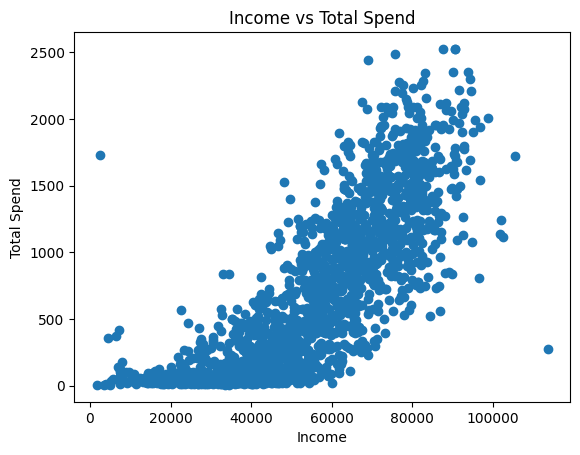

In [70]:
plt.scatter(data['Income'], data['TotalSpend'])
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.title('Income vs Total Spend')
plt.show()


# We can see that people whose income is between 0-80000, they tend to spend between 0-2000 or sometimes 2500, but people whose income is 100000 or above, they tend to spend less.

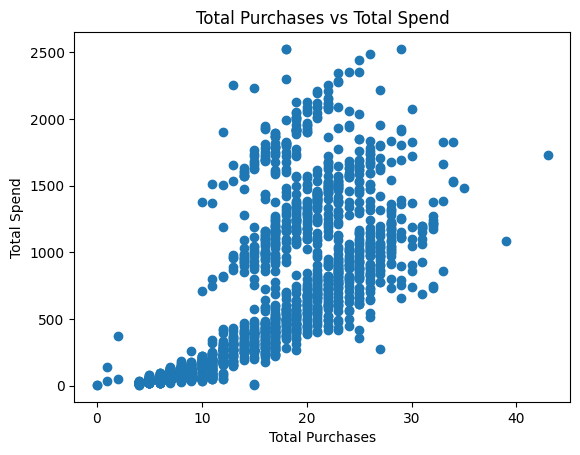

In [71]:
plt.scatter(data['TotalPurchases'], data['TotalSpend'])
plt.xlabel('Total Purchases')
plt.ylabel('Total Spend')
plt.title('Total Purchases vs Total Spend')
plt.show()

# We can see that total purchases between 5-30 spend more than total purchases 40 or above.

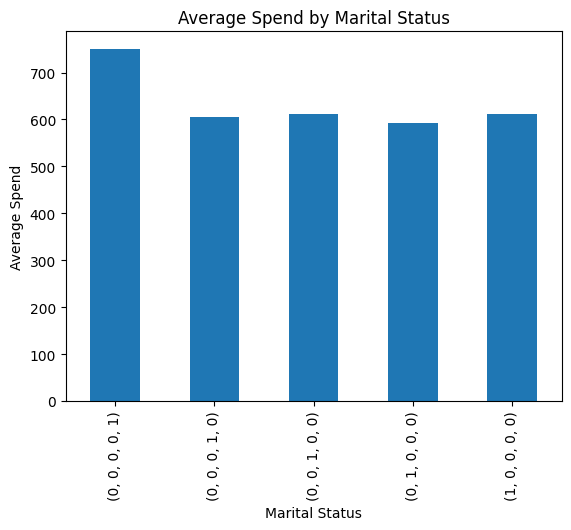

In [72]:
marital_status_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
avg_spend_by_marital_status = data.groupby(marital_status_columns)['TotalSpend'].mean()
avg_spend_by_marital_status.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Average Spend')
plt.title('Average Spend by Marital Status')
plt.show()

# Widows spend more than average than divorced,married,single, or together women.

In [73]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

<ipython-input-74-84a32de7d767>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')


Text(0, 0.5, 'MntTotal')

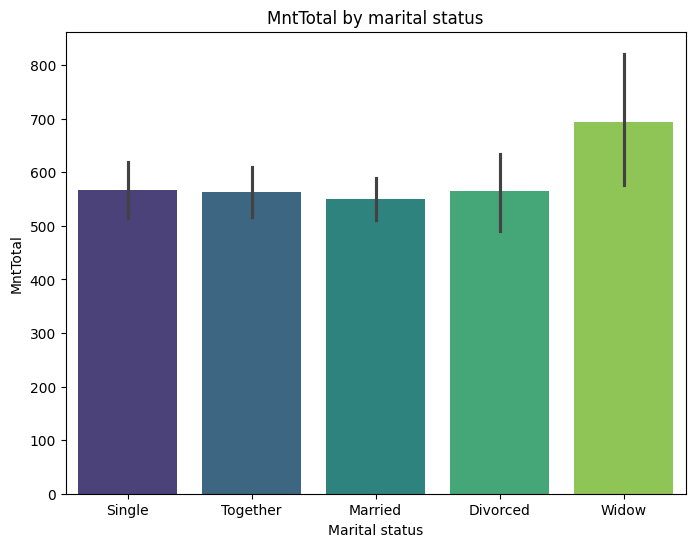

In [74]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

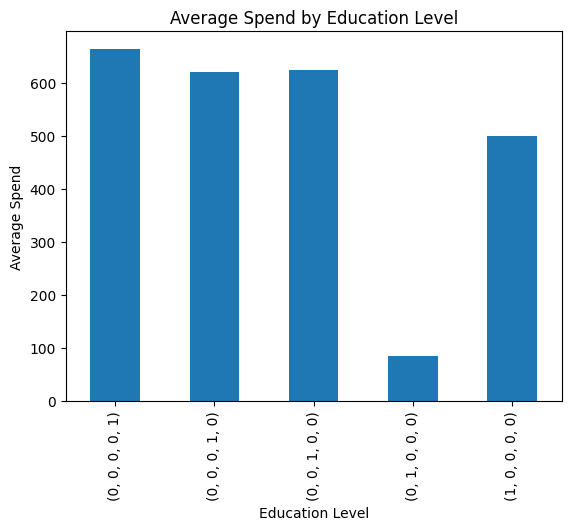

In [75]:
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
avg_spend_by_education = data.groupby(education_columns)['TotalSpend'].mean()
avg_spend_by_education.plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Average Spend')
plt.title('Average Spend by Education Level')
plt.show()

# PhD people spend more than average than the others. The least is spend by people who have basic education.

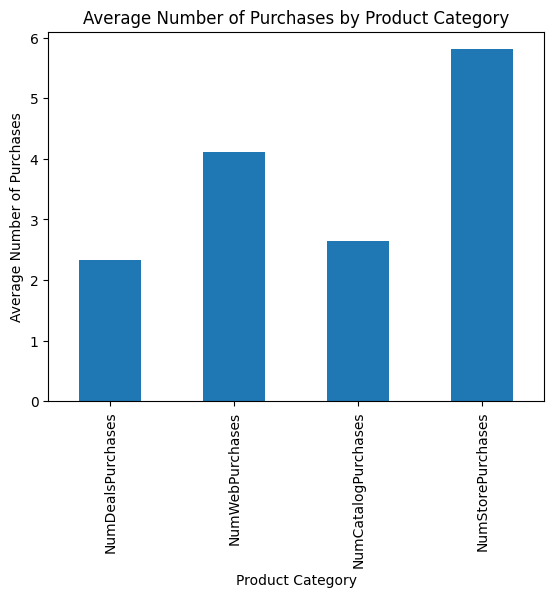

In [76]:
avg_purchases_by_category = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
avg_purchases_by_category.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Average Number of Purchases')
plt.title('Average Number of Purchases by Product Category')
plt.show()

# Store purchases are more bought in average than the others. The least is bought during Deals.

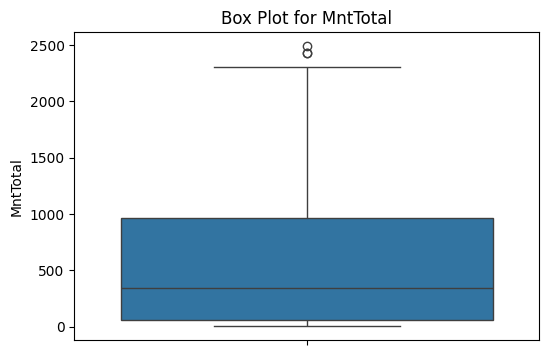

In [77]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

# The MntTotal ranges between 100-950 and beyond 2250, all are outliers.

<ipython-input-78-f37b914fcb56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y='Income', palette='viridis')


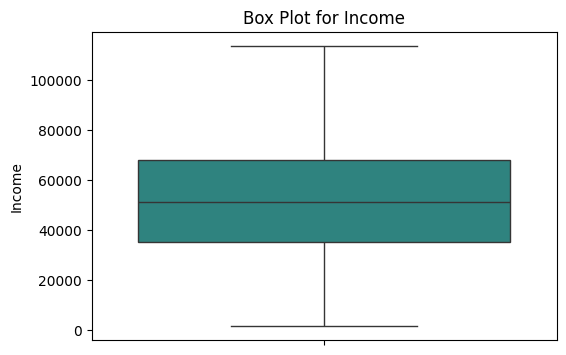

In [78]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

# The Income is between the ranges of 37000 and 65000.

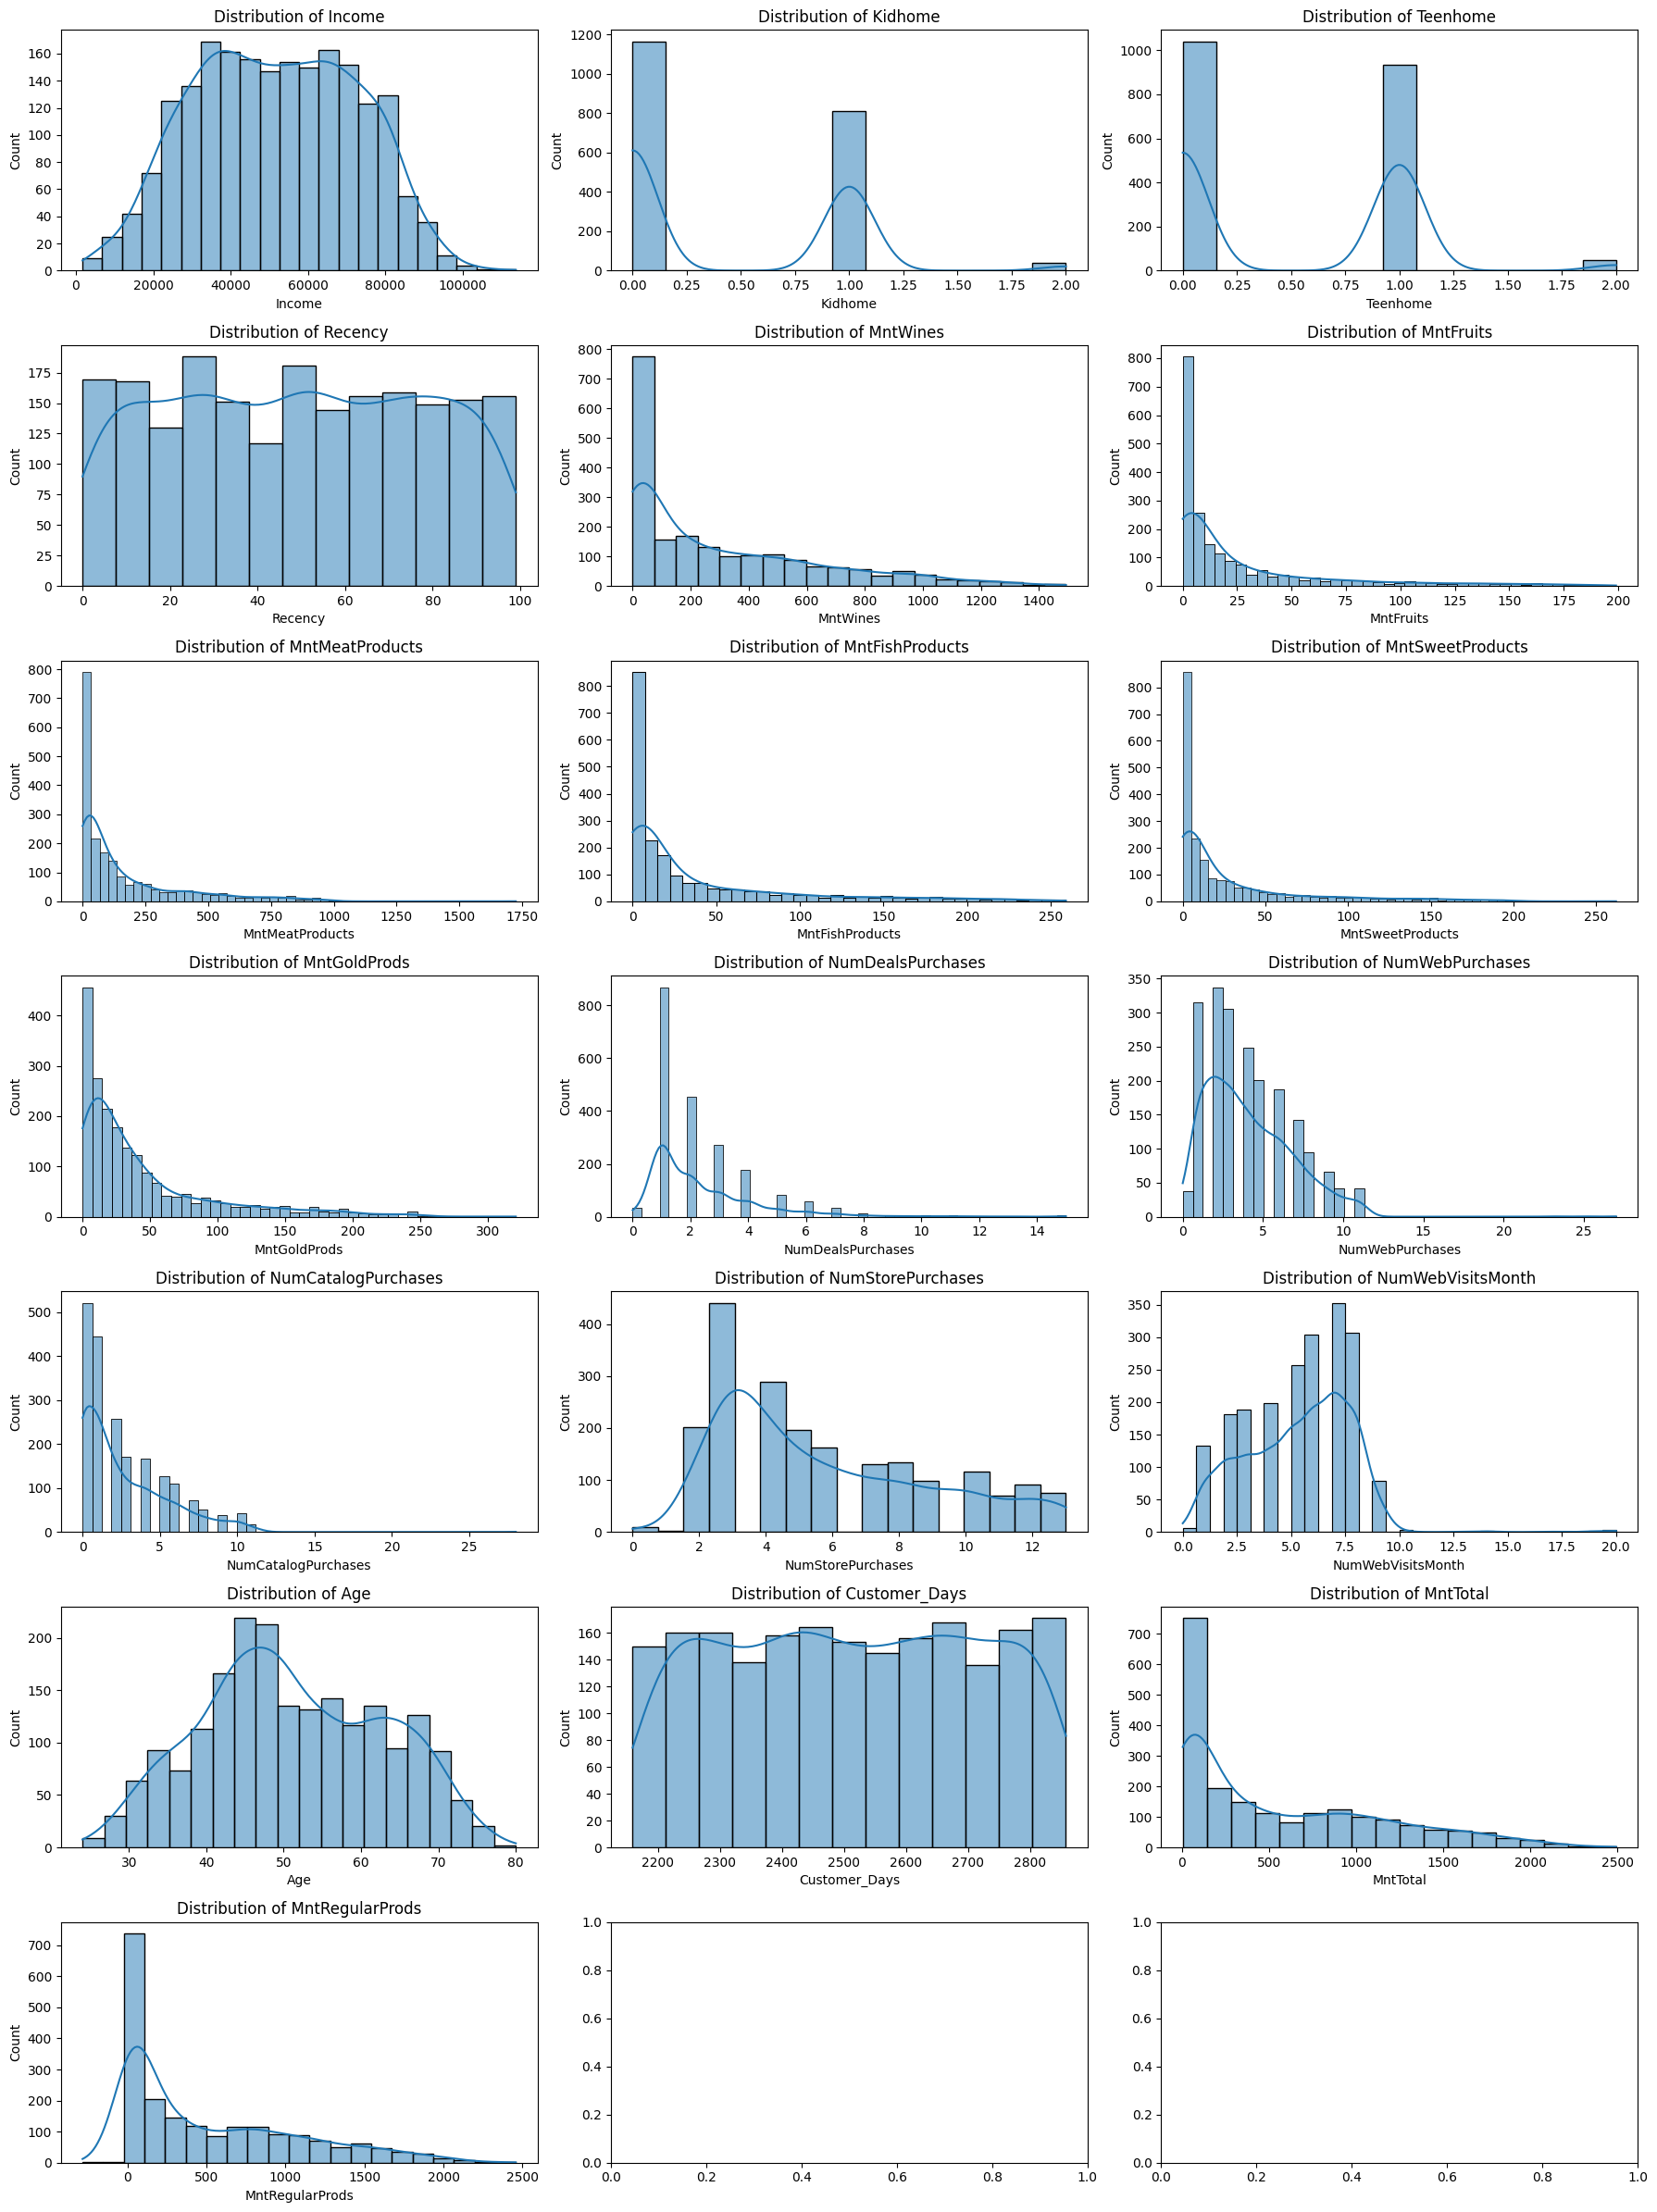

In [79]:
# List of numerical features to visualize
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days',
                      'MntTotal', 'MntRegularProds']

# Plot the distributions
fig, axes = plt.subplots(len(numerical_features) // 3 + 1, 3, figsize=(18, 24))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

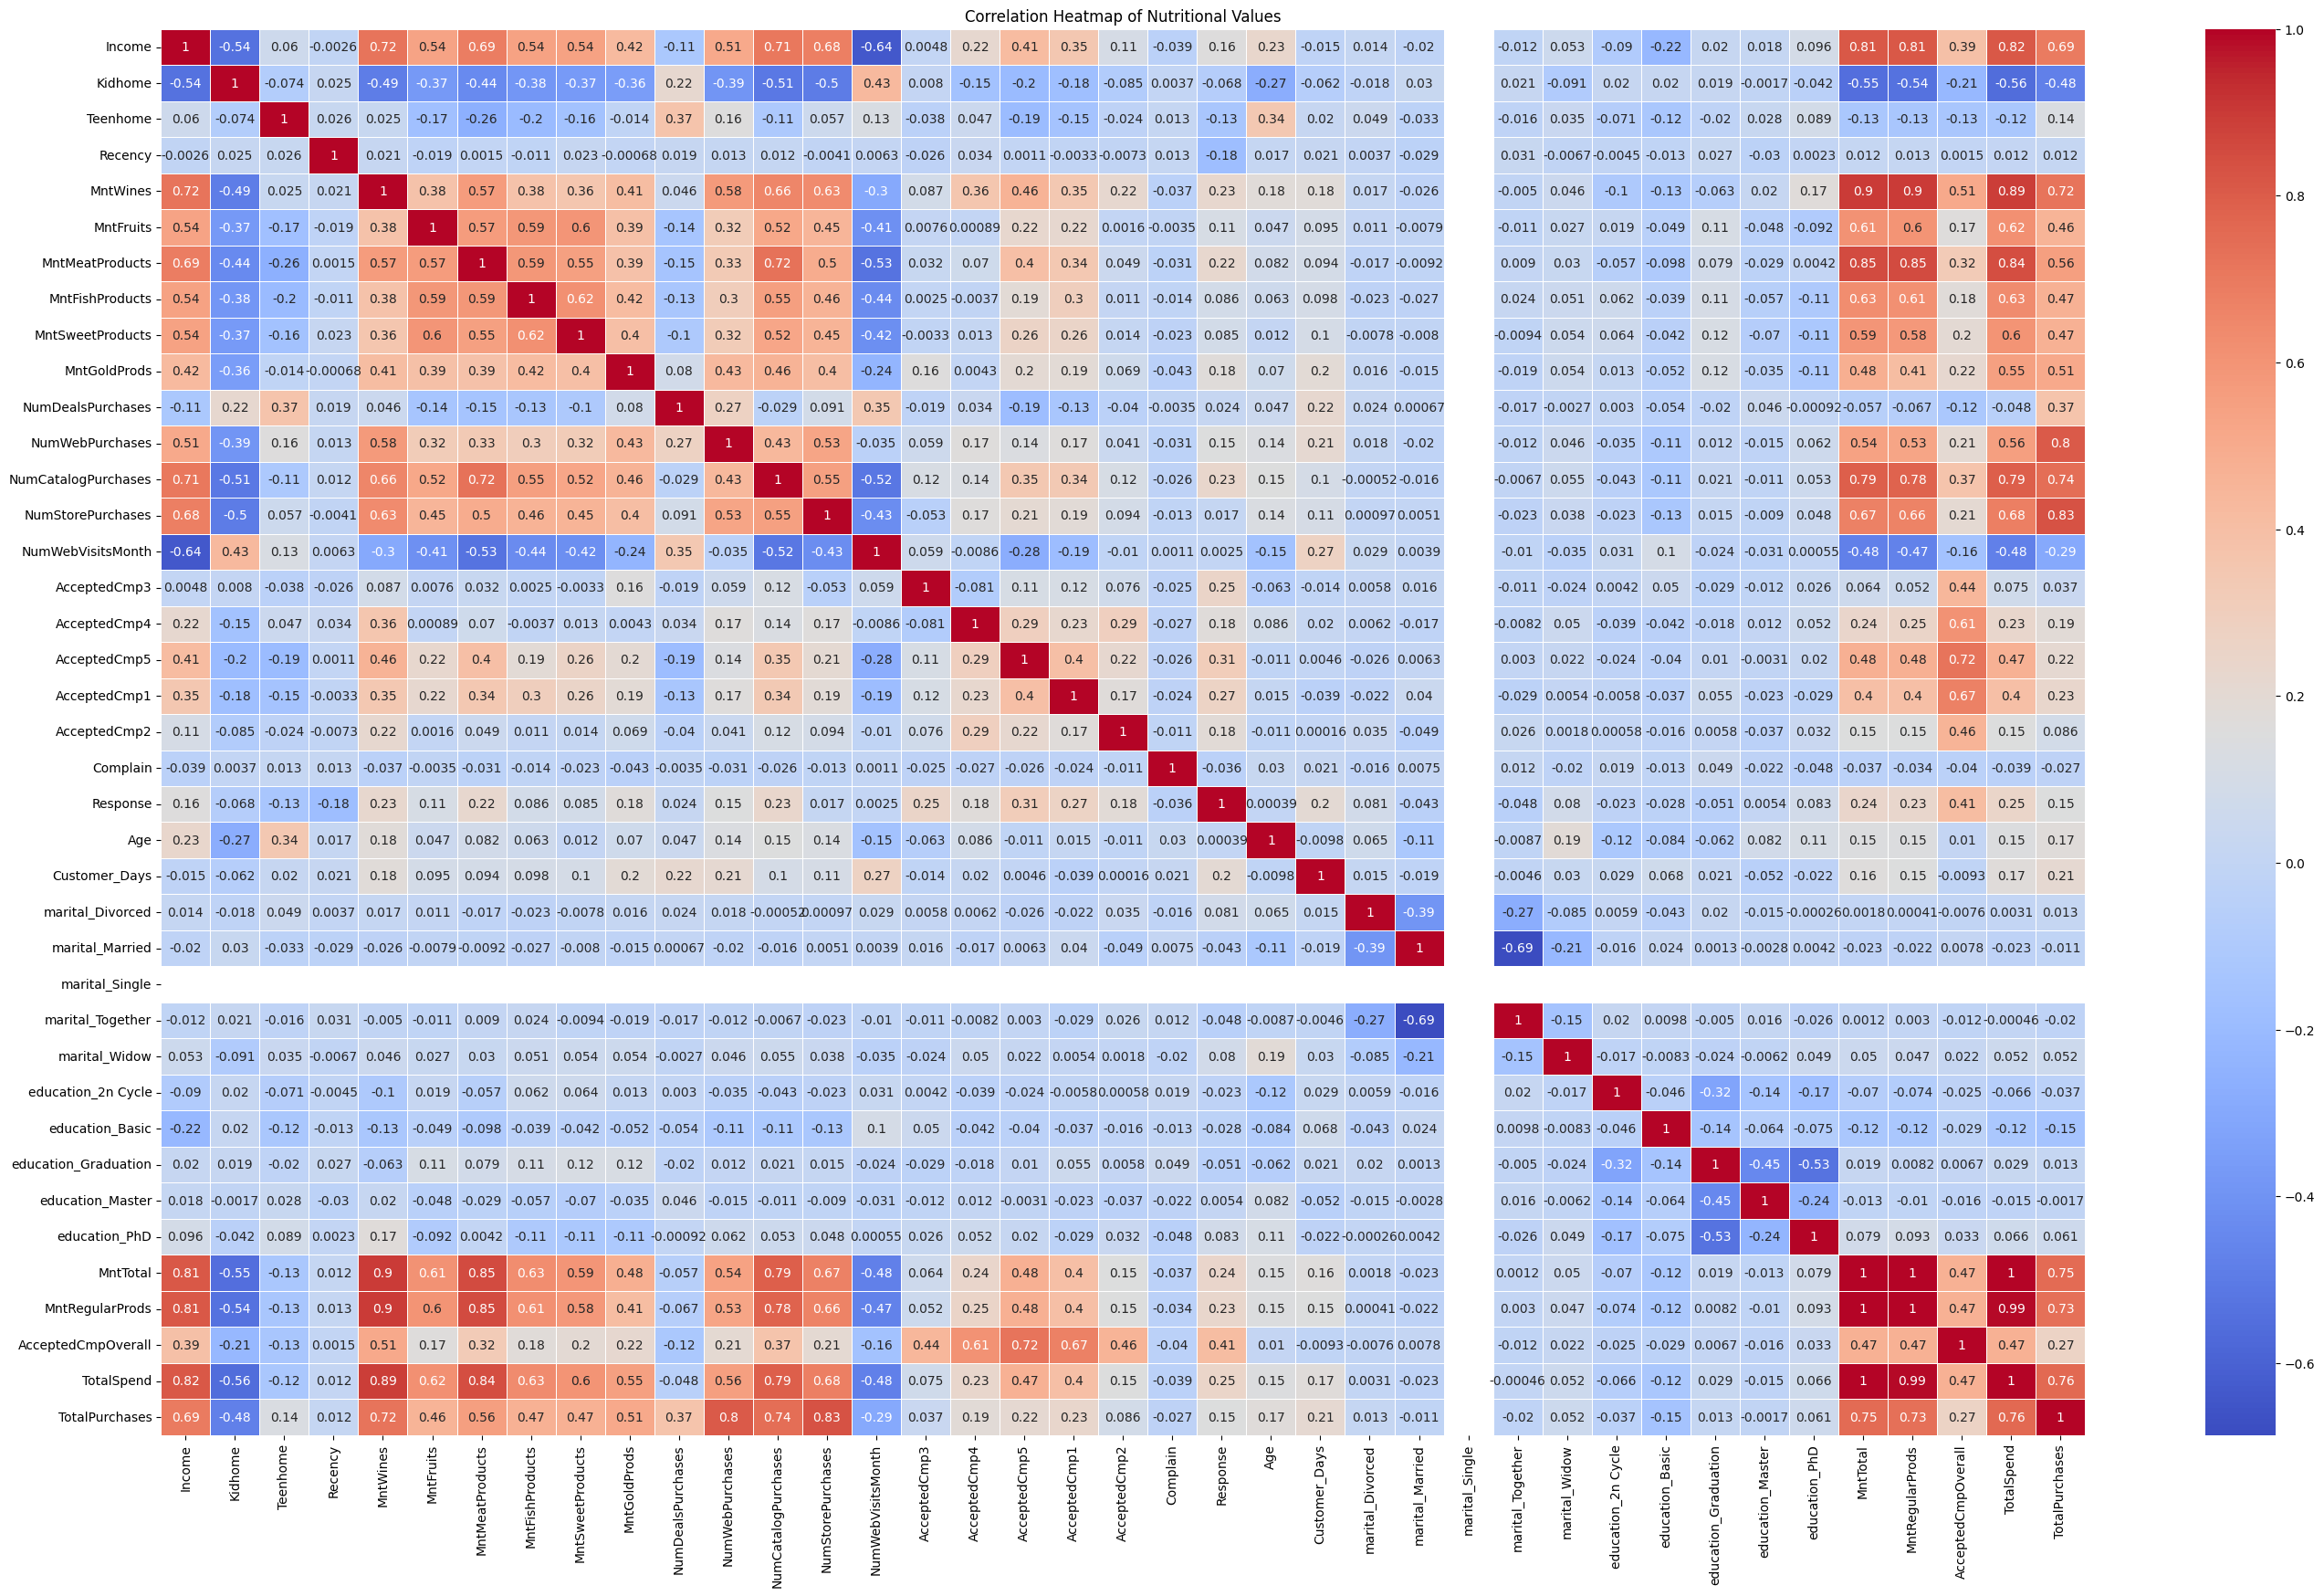

In [81]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
# Correlation Heatmap
plt.figure(figsize=(34, 20))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Values')
plt.show()

In [82]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)

<ipython-input-83-b9ddf7869c52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='In_relationship', y='MntTotal', data=data, palette='viridis')


Text(0, 0.5, 'MntTotal')

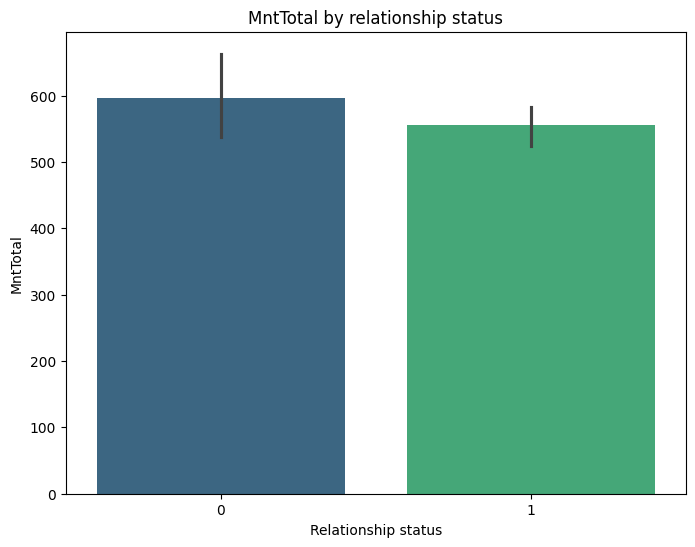

In [83]:
plt.figure(figsize=(8, 6))
sns.barplot(x='In_relationship', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by relationship status')
plt.xlabel('Relationship status')
plt.ylabel('MntTotal')

In [84]:
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,1.578000e+03,1.578000e+03,1.578000e+03
mean,2.870539e-17,-1.575982e-17,7.654770e-17
std,1.000317e+00,1.000317e+00,1.000317e+00
min,-2.473994e+00,-9.818121e-01,-2.134558e+00
25%,-7.929007e-01,-8.933383e-01,4.684811e-01
50%,1.922938e-02,-3.779017e-01,4.684811e-01
75%,8.005074e-01,6.939071e-01,4.684811e-01
max,2.642915e+00,3.395218e+00,4.684811e-01


# **CUSTOMER SEGMENTATION AND VISUALIZATION**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

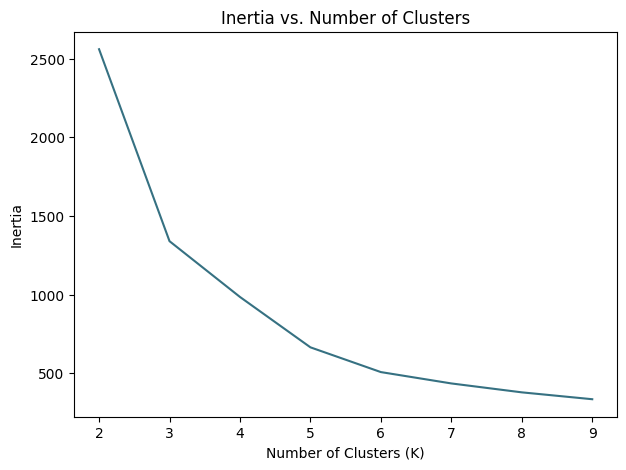

In [85]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

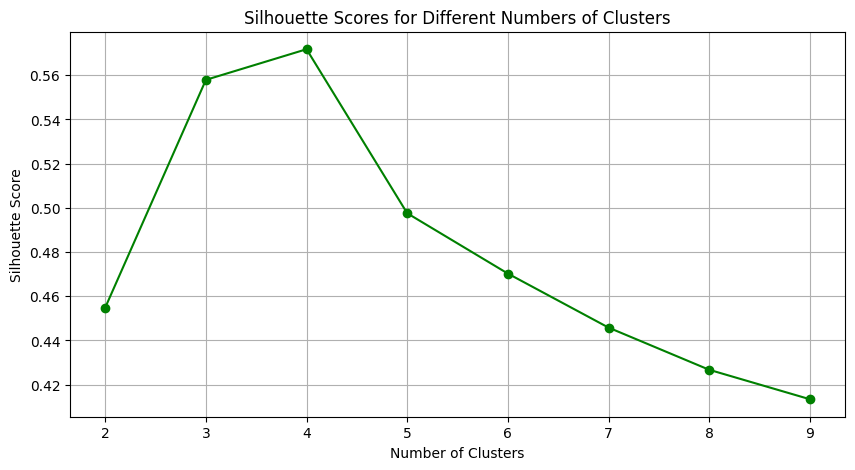

   Number of Clusters     Inertia  Silhouette Score
0                   2  334.964174          0.454875
1                   3  334.964174          0.557899
2                   4  334.964174          0.571757
3                   5  334.964174          0.497548
4                   6  334.964174          0.470248
5                   7  334.964174          0.445812
6                   8  334.964174          0.426721
7                   9  334.964174          0.413396


In [86]:
silhouette_scores = []
cluster_range = range(2, 10)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Combine the results for better interpretation
results = pd.DataFrame({'Number of Clusters': cluster_range, 'Inertia': inertia, 'Silhouette Score': silhouette_scores})
print(results)

# Here, the silhouette score is high for 4 clusters. So we choose that.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


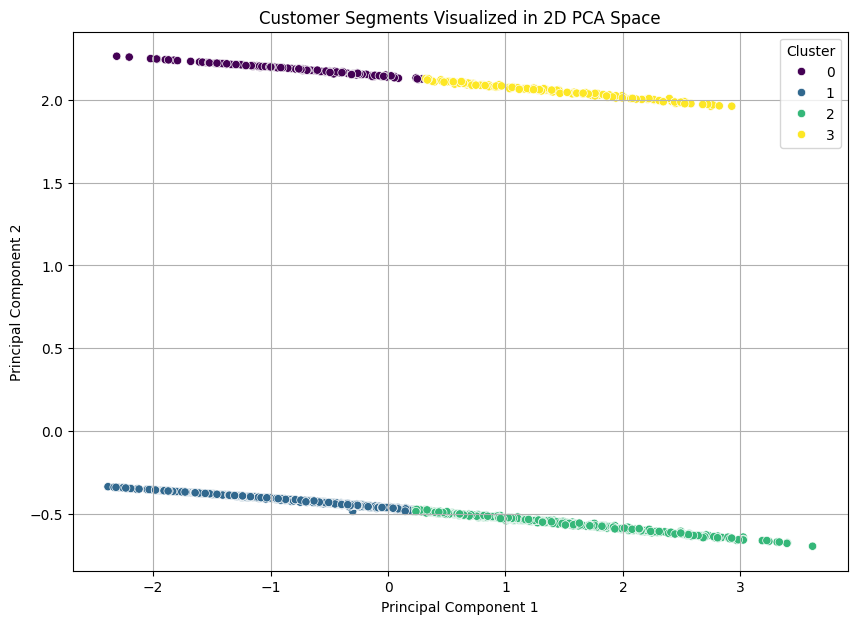

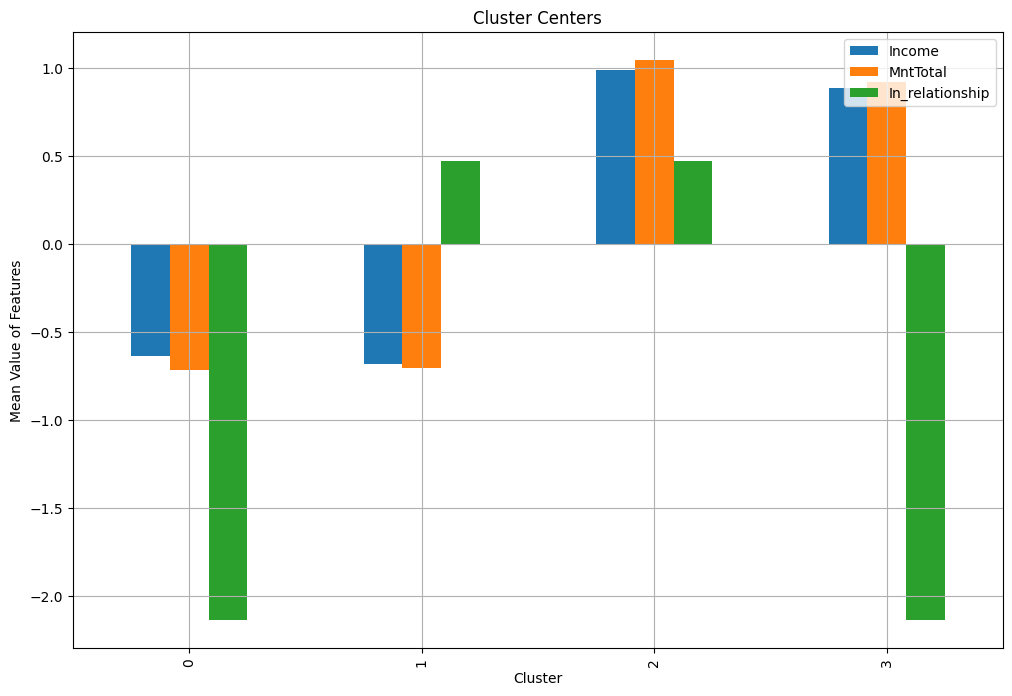

In [88]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
data_scaled['Cluster'] = cluster_labels

# PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Scatter plot of the clusters in the 2D PCA space
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segments Visualized in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Cluster Centers Visualization (mean value of features for each cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=cols_for_clustering)
cluster_centers['Cluster'] = range(optimal_clusters)

# Plot the cluster centers
cluster_centers.set_index('Cluster').plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Mean Value of Features')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

<ipython-input-90-e2133bc9520d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


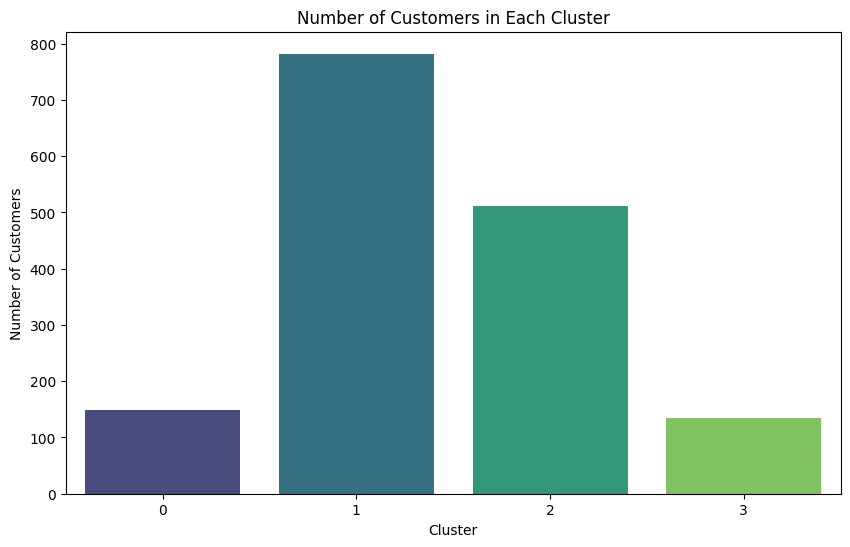

In [90]:
cluster_counts = data_scaled['Cluster'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.show()

# **INFERENCE**
The optimal number of clusters is 4, as indicated by both the Elbow Method and Silhouette Analysis. The Elbow Method suggests that 4 or 5 clusters could be reasonable, while the Silhouette Analysis shows the highest silhouette score for k=4.

From the bar plot, we can observe the following distribution of customers across different clusters:

Cluster 0: Approximately 150 customers

Cluster 1: Approximately 800 customers (the largest cluster)

Cluster 2: Approximately 600 customers

Cluster 3: Approximately 200 customers

This indicates that Cluster 1 contains the highest number of customers, followed by Cluster 2. Cluster 0 and Cluster 3 have fewer customers compared to the other two clusters.

# **RECOMMENDATIONS**
 Targeted Marketing:

Cluster 1, being the largest customer group, should have focused marketing efforts to enhance engagement. Tailored promotions, discounts, and loyalty programs can aid in retaining and boosting their spending habits. For Cluster 2, similar approaches as Cluster 1 can be utilized, but with messages customized to their unique preferences and behaviors.

Customer Retention Techniques:

Clusters 0 and 3, with smaller customer numbers, require a thorough analysis of their traits and actions to pinpoint any specific needs or challenges causing the lower customer count. Strategies like enhancing customer support, providing exclusive offers, and addressing pain points can aid in retention.

Resource Distribution:

Deploy marketing and customer service resources according to the cluster sizes. While Cluster 1 should receive significant attention due to its extensive customer base, it's crucial not to overlook Clusters 0 and 3, as they could potentially develop into lucrative markets with the right approach.

In-depth Examination:

Conduct a detailed exploration of each cluster to grasp their demographics, buying patterns, and preferences better. This insight will facilitate the creation of more individualized and impactful marketing strategies for each cluster.  